In [1]:
import numpy as np
import pandas as pd
import featuretools as ft
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [2]:
PATH = "../datasets/tradhist.csv"
df = pd.read_csv(PATH)

In [26]:
df.columns

Index(['Unnamed: 0', 'iso_o', 'iso_d', 'year', 'FLOW', 'FLOW_0', 'SOURCE_TF',
       'GDP_o', 'SOURCE_GDP_o', 'GDP_d', 'SOURCE_GDP_d', 'SH_PRIM_o',
       'SOURCE_SH_PRIM_o', 'SH_SECD_o', 'SOURCE_SH_SECD_o', 'SH_PRIM_d',
       'SOURCE_SH_PRIM_d', 'SH_SECD_d', 'SOURCE_SH_SECD_d', 'POP_o', 'POP_d',
       'SOURCE_POP_o', 'SOURCE_POP_d', 'IPTOT_o', 'SOURCE_IPTOT_o', 'IPTOT_d',
       'SOURCE_IPTOT_d', 'XPTOT_o', 'SOURCE_XPTOT_o', 'XPTOT_d',
       'SOURCE_XPTOT_d', 'BITARIFF', 'TARIFF_o', 'SOURCE_TARIFF_o', 'TARIFF_d',
       'SOURCE_TARIFF_d', 'Distw', 'Dist_coord', 'Dist_o', 'Dist_d',
       'SeaDist_SHRT', 'SeaDist_2CST', 'Comlang', 'Contig', 'Curcol', 'Metro',
       'Colo', 'Curcol_o', 'Curcol_d', 'Evercol', 'XCH_RATE_o', 'SOURCE_XCH_o',
       'XCH_RATE_d', 'SOURCE_XCH_d', 'CONTI_o', 'CONTI_d', 'REGIO_o',
       'REGIO_d', 'OECD_o', 'OECD_d', 'EU_o', 'EU_d', 'GATT_o', 'GATT_d'],
      dtype='object')

In [35]:
features = ["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "Comlang", "Contig", "OECD_o", "OECD_d",
            "GATT_o", "GATT_d", "XPTOT_o", "year", "FLOW", 'IPTOT_d', 'IPTOT_o', 'XPTOT_d', "iso_o", "iso_d"]
new_df = df[features]
new_df.shape

(2502427, 19)

In [8]:
cleaned_df = new_df.loc[(new_df["year"] > 2008) & (new_df["FLOW"] > 100)].dropna()
cleaned_df.shape

(129408, 17)

In [9]:
cleaned_df

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,OECD_o,OECD_d,GATT_o,GATT_d,XPTOT_o,year,FLOW,IPTOT_d,IPTOT_o,XPTOT_d
1707,1.613070e+09,1.119100e+10,101.936,28809.168,13168.223762,0.0,0.0,0.0,0.0,0.0,0.0,2.671829e+09,2011,60232.73,6.612774e+09,3.692892e+09,3.224723e+08
1839,1.604113e+09,1.627569e+11,101.416,7705.423,12773.079714,0.0,0.0,0.0,0.0,0.0,1.0,1.363620e+09,2009,11195.58,9.999943e+10,1.571841e+09,1.232484e+11
1841,1.613070e+09,2.175294e+11,101.936,8734.722,12773.079714,0.0,0.0,0.0,0.0,0.0,1.0,2.671829e+09,2011,113576.80,1.365564e+11,3.692892e+09,1.884906e+11
1874,1.604113e+09,2.417646e+11,101.416,40798.640,5187.787570,0.0,0.0,0.0,0.0,0.0,1.0,1.363620e+09,2009,894681.06,2.489420e+10,1.571841e+09,3.806315e+10
1875,1.597046e+09,2.987639e+11,101.597,41222.875,5187.787570,0.0,0.0,0.0,0.0,0.0,1.0,1.848131e+08,2010,166.97,3.636240e+10,9.023266e+08,4.582931e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502422,6.097825e+09,1.311544e+10,13973.897,13917.439,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.070475e+09,2010,46558256.00,3.442585e+09,2.673542e+09,4.636377e+09
2502423,6.838230e+09,1.464204e+10,14255.592,14343.526,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.192061e+09,2011,55171376.00,4.543546e+09,3.097955e+09,5.510135e+09
2502424,7.845171e+09,1.614464e+10,14565.482,14786.581,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.457760e+09,2012,58787336.00,5.562818e+09,3.321382e+09,5.922680e+09
2502425,8.629172e+09,1.793963e+10,14898.092,15246.086,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.243481e+09,2013,77869780.00,6.515267e+09,3.244361e+09,6.770876e+09


In [10]:
cleaned_df = cleaned_df.drop(["year"], axis=1)
X = cleaned_df[["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "Comlang", "Contig",
                 "XPTOT_o", "FLOW", 'IPTOT_d', 'IPTOT_o', 'XPTOT_d']]

y = cleaned_df[["FLOW"]]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
X_train.shape

(97056, 12)

In [13]:
X_test.shape

(32352, 12)

In [14]:
train_features, valid_features, train_y, valid_y = train_test_split(X_train, y_train,
                                                                    test_size = 0.25, random_state = 42)

In [17]:
model = lgb.LGBMRegressor()

In [18]:
model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)],
          eval_metric = 'rmse', verbose = 200)

LGBMRegressor()

In [19]:
model.score(X_test, y_test)

0.9132605749387133

In [20]:
new_lgb = lgb.LGBMRegressor(n_estimators=10000)

In [21]:
new_lgb.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)],
          eval_metric = 'rmse', verbose = 200)

[200]	valid_0's rmse: 1.06754e+09	valid_0's l2: 1.13964e+18
[400]	valid_0's rmse: 1.00889e+09	valid_0's l2: 1.01786e+18
[600]	valid_0's rmse: 9.88699e+08	valid_0's l2: 9.77525e+17
[800]	valid_0's rmse: 9.81673e+08	valid_0's l2: 9.63683e+17
[1000]	valid_0's rmse: 9.75293e+08	valid_0's l2: 9.51197e+17
[1200]	valid_0's rmse: 9.67129e+08	valid_0's l2: 9.35338e+17
[1400]	valid_0's rmse: 9.64505e+08	valid_0's l2: 9.3027e+17
[1600]	valid_0's rmse: 9.63762e+08	valid_0's l2: 9.28838e+17
[1800]	valid_0's rmse: 9.62985e+08	valid_0's l2: 9.27339e+17
[2000]	valid_0's rmse: 9.62626e+08	valid_0's l2: 9.26649e+17
[2200]	valid_0's rmse: 9.62349e+08	valid_0's l2: 9.26115e+17


LGBMRegressor(n_estimators=10000)

In [22]:
new_lgb.score(X_test, y_test)

0.9350867720600462

# Graph depicting the trade flows

In [36]:
data = new_df.loc[(new_df["year"] == 2013)]

In [37]:
data

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,OECD_o,OECD_d,GATT_o,GATT_d,XPTOT_o,year,FLOW,IPTOT_d,IPTOT_o,XPTOT_d,iso_o,iso_d
39,NaN,2.078323e+09,NaN,75.902,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2013,NaN,NaN,NaN,NaN,NaN,AND
75,NaN,NaN,NaN,55.302,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2013,NaN,2.238814e+08,NaN,2.494678e+08,NaN,ASM
398,NaN,2.019574e+08,NaN,103.718,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2013,NaN,1.200593e+08,NaN,2.218025e+07,NaN,FSM
480,NaN,NaN,NaN,165.121,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2013,NaN,NaN,NaN,2.895298e+07,NaN,GUM
513,NaN,4.320482e+09,NaN,86.462,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2013,NaN,NaN,NaN,NaN,NaN,IMN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501970,8.629172e+09,5.128723e+08,14898.092,253.165,13928.922555,1.0,0.0,0.0,0.0,1.0,1.0,2.243481e+09,2013,0.000000e+00,6.212593e+08,3.244361e+09,1.697843e+08,ZWE,VUT
2502074,8.629172e+09,5.090125e+08,14898.092,190.390,15679.510322,1.0,0.0,0.0,0.0,1.0,1.0,2.243481e+09,2013,0.000000e+00,3.037680e+08,3.244361e+09,1.141149e+08,ZWE,WSM
2502124,8.629172e+09,2.299869e+10,14898.092,25533.217,4001.151483,0.0,0.0,0.0,0.0,1.0,0.0,2.243481e+09,2013,5.115580e+05,9.887240e+09,3.244361e+09,6.797389e+09,ZWE,YEM
2502312,8.629172e+09,2.341530e+11,14898.092,53192.215,1258.552211,1.0,1.0,0.0,0.0,1.0,1.0,2.243481e+09,2013,2.402471e+08,7.245120e+10,3.244361e+09,8.031384e+10,ZWE,ZAF


In [38]:
data = data.loc[(data["iso_o"] == "USA")]

In [39]:
data = data.dropna()

In [40]:
data

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,OECD_o,OECD_d,GATT_o,GATT_d,XPTOT_o,year,FLOW,IPTOT_d,IPTOT_o,XPTOT_d,iso_o,iso_d
2328256,1.065877e+13,1.282286e+10,316427.4,30682.500,11626.578951,0.0,0.0,1.0,0.0,1.0,0.0,1.009660e+12,2013,9.918583e+08,5.355286e+09,1.450988e+12,4.257171e+08,USA,AFG
2328350,1.065877e+13,7.990138e+10,316427.4,23448.201,12153.605553,0.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,1.015641e+09,1.422024e+10,1.450988e+12,4.239514e+10,USA,AGO
2328433,1.065877e+13,8.175526e+09,316427.4,2896.652,8882.747080,0.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,5.232510e+07,3.133526e+09,1.450988e+12,1.470210e+09,USA,ALB
2328687,1.065877e+13,2.476717e+11,316427.4,9039.978,12196.149826,0.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,1.720541e+10,1.648221e+11,1.450988e+12,2.424315e+11,USA,ARE
2328875,1.065877e+13,3.991050e+11,316427.4,42538.305,8678.352247,1.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,5.192647e+09,4.733664e+10,1.450988e+12,5.258155e+10,USA,ARG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350578,1.065877e+13,5.090125e+08,316427.4,190.390,10017.215222,1.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,1.997924e+07,3.037680e+08,1.450988e+12,1.141149e+08,USA,WSM
2350645,1.065877e+13,2.299869e+10,316427.4,25533.217,12630.027024,0.0,0.0,1.0,0.0,1.0,0.0,1.009660e+12,2013,3.646560e+08,9.887240e+09,1.450988e+12,6.797389e+09,USA,YEM
2350897,1.065877e+13,2.341530e+11,316427.4,53192.215,14418.611678,1.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,4.627225e+09,7.245120e+10,1.450988e+12,8.031384e+10,USA,ZAF
2351181,1.065877e+13,1.793963e+10,316427.4,15246.086,13702.220374,1.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,1.301096e+08,6.515267e+09,1.450988e+12,6.770876e+09,USA,ZMB


In [42]:
X_plot = data[["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "Comlang", "Contig",
                "XPTOT_o", "FLOW", 'IPTOT_d', 'IPTOT_o', 'XPTOT_d']]

y_plot = data[["FLOW"]]

In [44]:
data["forecast"] = new_lgb.predict(X_plot)

In [45]:
data

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,OECD_o,OECD_d,GATT_o,GATT_d,XPTOT_o,year,FLOW,IPTOT_d,IPTOT_o,XPTOT_d,iso_o,iso_d,forecast
2328256,1.065877e+13,1.282286e+10,316427.4,30682.500,11626.578951,0.0,0.0,1.0,0.0,1.0,0.0,1.009660e+12,2013,9.918583e+08,5.355286e+09,1.450988e+12,4.257171e+08,USA,AFG,9.817014e+08
2328350,1.065877e+13,7.990138e+10,316427.4,23448.201,12153.605553,0.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,1.015641e+09,1.422024e+10,1.450988e+12,4.239514e+10,USA,AGO,1.013332e+09
2328433,1.065877e+13,8.175526e+09,316427.4,2896.652,8882.747080,0.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,5.232510e+07,3.133526e+09,1.450988e+12,1.470210e+09,USA,ALB,1.242794e+08
2328687,1.065877e+13,2.476717e+11,316427.4,9039.978,12196.149826,0.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,1.720541e+10,1.648221e+11,1.450988e+12,2.424315e+11,USA,ARE,1.719364e+10
2328875,1.065877e+13,3.991050e+11,316427.4,42538.305,8678.352247,1.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,5.192647e+09,4.733664e+10,1.450988e+12,5.258155e+10,USA,ARG,5.179830e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350578,1.065877e+13,5.090125e+08,316427.4,190.390,10017.215222,1.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,1.997924e+07,3.037680e+08,1.450988e+12,1.141149e+08,USA,WSM,-5.724973e+06
2350645,1.065877e+13,2.299869e+10,316427.4,25533.217,12630.027024,0.0,0.0,1.0,0.0,1.0,0.0,1.009660e+12,2013,3.646560e+08,9.887240e+09,1.450988e+12,6.797389e+09,USA,YEM,3.624593e+08
2350897,1.065877e+13,2.341530e+11,316427.4,53192.215,14418.611678,1.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,4.627225e+09,7.245120e+10,1.450988e+12,8.031384e+10,USA,ZAF,4.619280e+09
2351181,1.065877e+13,1.793963e+10,316427.4,15246.086,13702.220374,1.0,0.0,1.0,0.0,1.0,1.0,1.009660e+12,2013,1.301096e+08,6.515267e+09,1.450988e+12,6.770876e+09,USA,ZMB,1.447119e+08


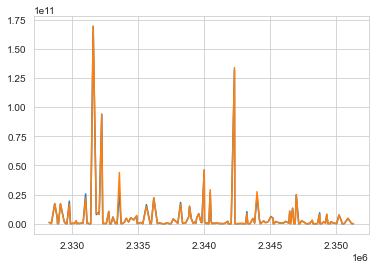

In [50]:
plt.plot(data["FLOW"])
plt.plot(data["forecast"])


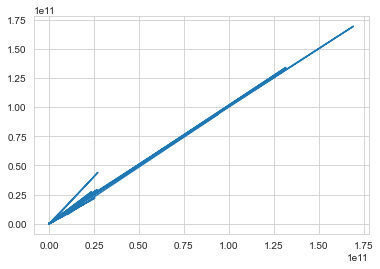

In [47]:
plt.plot(data["FLOW"], data["forecast"])